In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np

import os 
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from supporting_function import*

In [3]:
df = pd.read_csv("azd.csv")

In [4]:
#Filtering the data. 
df=df[['priceDate','arrivals','minPrice','maxPrice','modalPrice']] 

In [5]:
df["mis_m1_minprice"]    = df["minPrice"]
df["mis_m1_maxprice"]    = df["maxPrice"]
df["mis_m1_modalprice"]  = df["modalPrice"]
####
df["mis_m2_minprice"]    = df["minPrice"]
df["mis_m2_maxprice"]    = df["maxPrice"]
df["mis_m2_modalprice"]  = df["modalPrice"]
####

In [6]:
df = df.drop_duplicates()

In [7]:
#Writing Descriptive analysis. 
file_path ="csv_output/descriptive_analysis.csv"
if os.path.exists(file_path):
    print("File already written!!!.....")
else:
    df.describe().to_csv(file_path)

File already written!!!.....


In [8]:
# Missing Value Treatment
#Method 1 : Using mean to substitute missing values. 
col_name = "mis_m1_minprice"
df = replace_mis_val_mean(df,col_name)

col_name = "mis_m1_maxprice"
df = replace_mis_val_mean(df,col_name)


col_name = "mis_m1_modalprice"
df = replace_mis_val_mean(df,col_name)




In [9]:
# Missing Value Treatment
#Method 2 : Using Linear Regression for filling missing values 
col_name = "mis_m2_minprice"
df = mis_replace_linear_regression(df,X_col= ["maxPrice","modalPrice"],Y_col=col_name)

col_name = "mis_m2_maxprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


col_name = "mis_m2_modalprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [10]:
# Outlier handling
col_name ="mis_m2_minprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_maxprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_modalprice"
df = handle_outlier(df,col_name,df[col_name].mean())

In [11]:
# df.head()

In [12]:
df_new = df.copy()

In [13]:
df_ts =df_new[["priceDate","mis_m2_minprice","mis_m2_maxprice","mis_m2_modalprice"]]

In [14]:
#df_ts.head()

In [15]:
df_ts.columns = ["timestamp","min_price","max_price","modal_price"]

In [16]:
df_ts["timestamp"]= pd.to_datetime(df_ts["timestamp"])

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Saving Figure!!!!


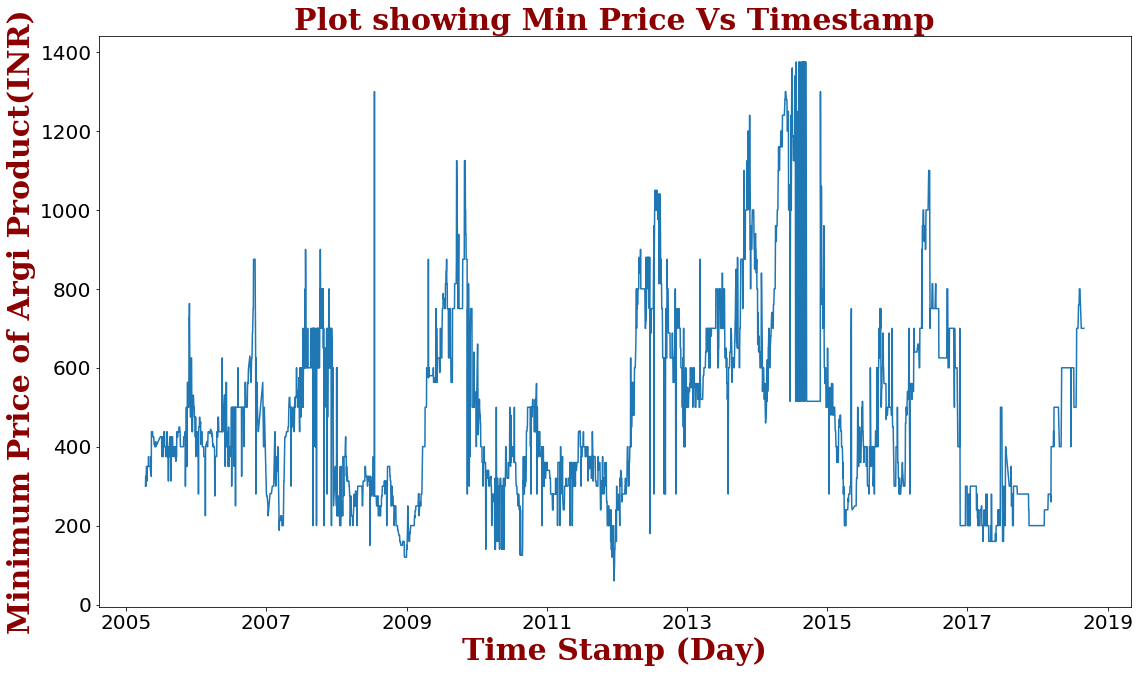

Saving Figure!!!!


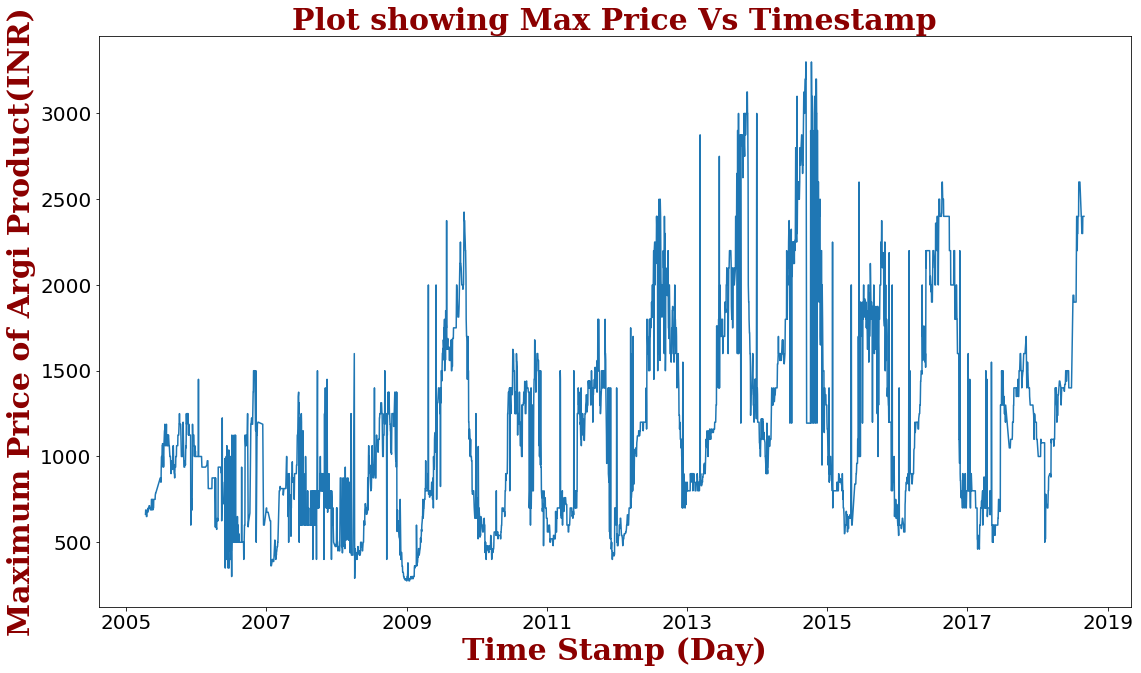

Saving Figure!!!!


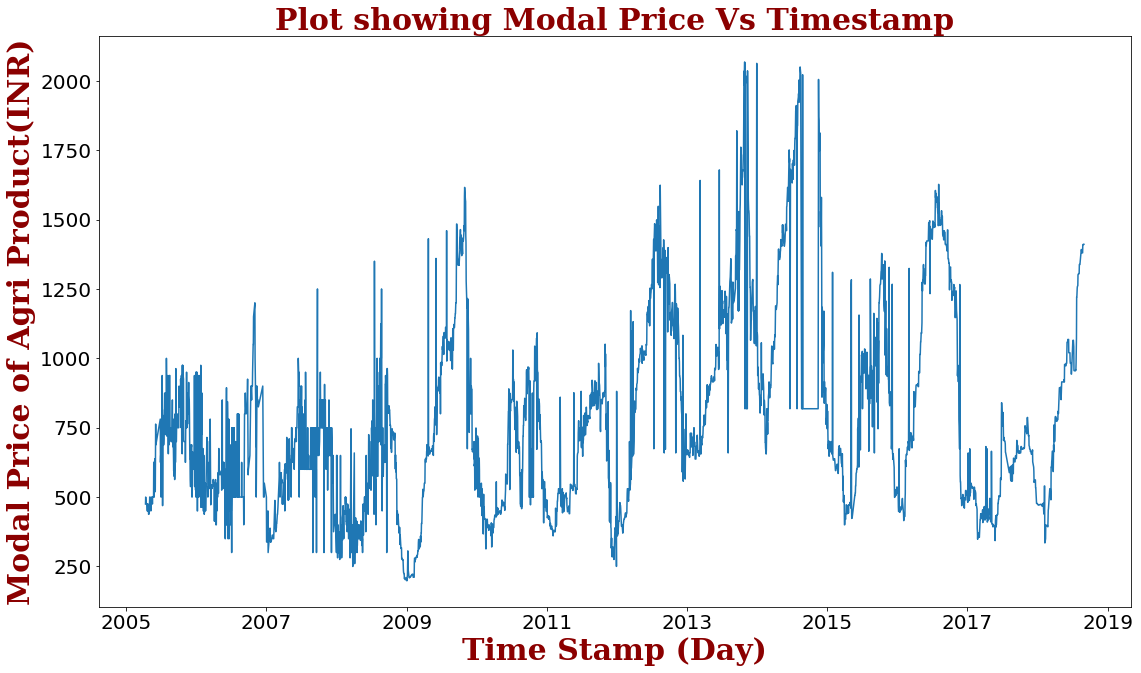

In [17]:
####
df_plot_series = df_ts.copy()
time_col = "Time Stamp (Day)"
min_col  = "Minimum Price of Argi Product(INR)"
max_col  = "Maximum Price of Argi Product(INR)"
mod_col  = "Modal Price of Agri Product(INR)"
df_plot_series.columns = [time_col,min_col,max_col,mod_col]
#######


title = "Plot showing Min Price Vs Timestamp"
file_path = "plots/Actual_minprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=min_col,title=title,hard_save=True)


title = "Plot showing Max Price Vs Timestamp"
file_path = "plots/Actual_maxprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=max_col,title=title,hard_save=True)

title = "Plot showing Modal Price Vs Timestamp"
file_path = "plots/Actual_modprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=mod_col,title=title,hard_save=True)







In [19]:
file_path_fun_mva=lambda x,y: "plots/"+x+'_moving_averages_'+ convert_list_to_str(y) +".png"

In [20]:
file_path_fun_mva('min',[30,50,100])

'plots/min_moving_averages_30_50_100.png'

Saving Figure!!!!


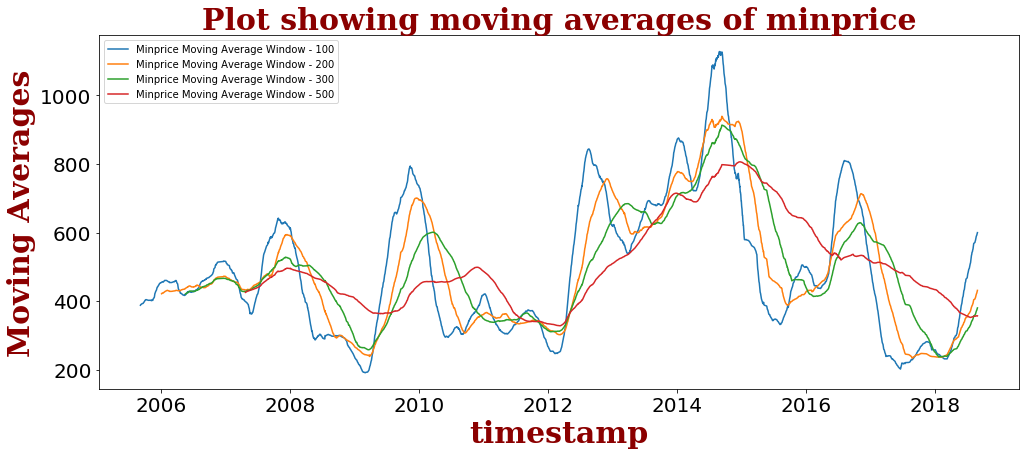

Saving Figure!!!!


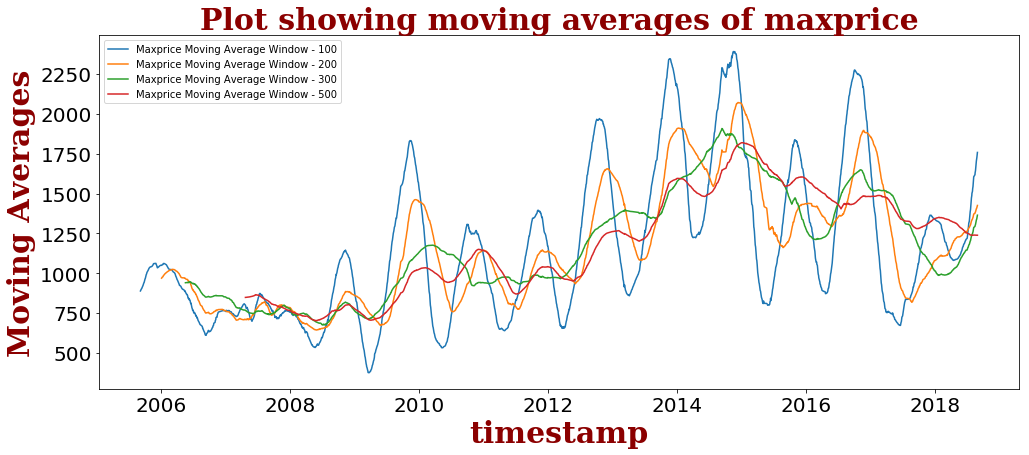

Saving Figure!!!!


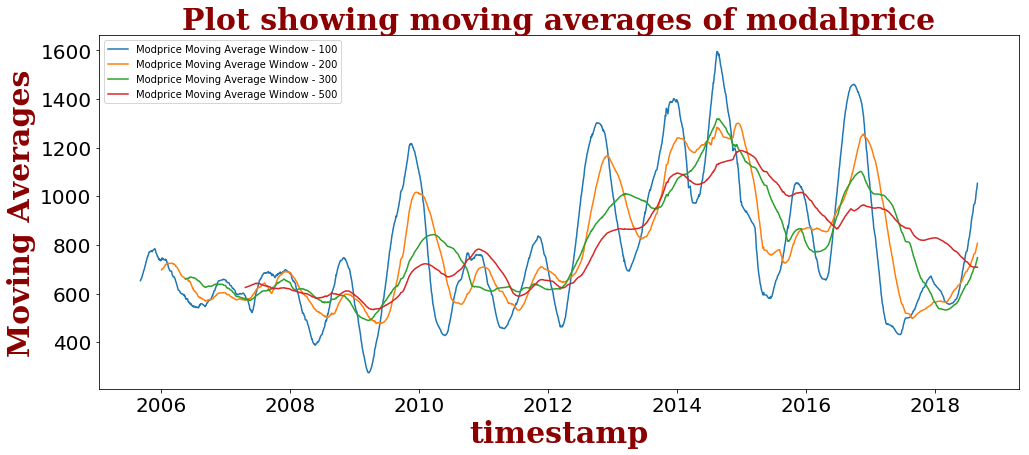

In [21]:
###################  

df_ts_m= df_ts.copy()

col_name_min = "min_price"
col_name_prefix_min = "Minprice"
##
col_name_max = "max_price"
col_name_prefix_max = "Maxprice"
##
col_name_mod = "modal_price"
col_name_prefix_mod = "Modprice"
##
window_size_list = [100,200,300,500]
data_col_list    = []
##

    
#file_path_fun_mva=lambda x,y: " plots/"+x+'_moving_averages_'+ _convert_list_to_str(window_size_list) +".png"

col_function = lambda x,y : x +"_"+"m_avg_"+str(y)
col_function_bus = lambda x,y : x +" "+"Moving Average Window - "+str(y)

generate_col = col_function_bus


df_ts_m,data_col_list_min=find_moving_averages(df_ts_m,col_name_min,col_name_prefix_min,window_size_list,generate_col)
df_ts_m,data_col_list_max=find_moving_averages(df_ts_m,col_name_max,col_name_prefix_max,window_size_list,generate_col)
df_ts_m,data_col_list_mod=find_moving_averages(df_ts_m,col_name_mod,col_name_prefix_mod,window_size_list,generate_col)

#############################  PLOT FOR MOVING AVERAGE

title = "Plot showing moving averages of minprice"

x_col  = "timestamp"
plotting_multiple_series(df_ts_m,file_path_fun_mva('min',window_size_list),data_col_list_min,x_col,title=title,hard_save=True)


title = "Plot showing moving averages of maxprice"
file_path = "plots/max_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('max',window_size_list),data_col_list_max,x_col,title=title,hard_save=True)

title = "Plot showing moving averages of modalprice"
file_path = "plots/modal_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('mod',window_size_list),data_col_list_mod,x_col,title=title,hard_save=True)

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import defaultdict

In [38]:
######Forecasting Starts Here Partition Train and test data.  
train_df = df_ts[2000:3600] #:3200
test_df  = df_ts[3600:]

train_df.index = train_df["timestamp"]
train_df = train_df.resample('D').mean()
test_df.index  = test_df["timestamp"]
test_df = test_df.resample('D').mean()
performance_statistics = defaultdict(lambda : {})


In [39]:
train_df = train_df.interpolate(limit_direction='both')
test_df  = test_df.interpolate(limit_direction='both')

In [40]:
train_df.head()

,min_price,max_price,modal_price
timestamp,,,
2012-05-03,900.0,1200.0,1036.0
2012-05-04,900.0,1200.0,1031.0
2012-05-05,800.0,1200.0,1025.0
2012-05-06,800.0,1200.0,1026.5
2012-05-07,800.0,1200.0,1028.0


In [41]:
forecast_col_name = "min_price"
timestamp_col_name = "timestamp"
train_df_col = train_df[forecast_col_name]
test_df_col  = test_df[forecast_col_name]
pd_train_df_col = pd.DataFrame(train_df_col)
pd_test_df_col  = pd.DataFrame(test_df_col)

In [42]:
pd_train_df_col.columns

Index(['min_price'], dtype='object')

Saving Figure!!!!


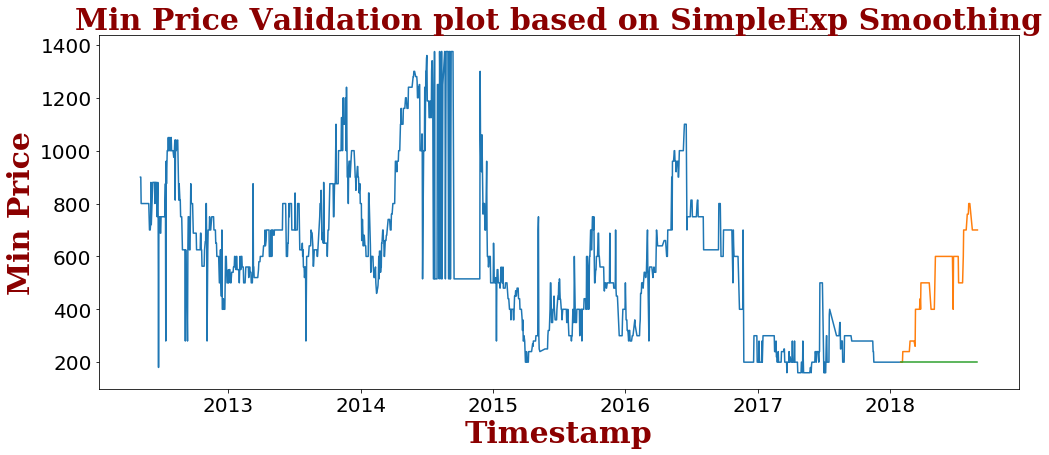

In [43]:
## Forecast Method 1
fit1 =SimpleExpSmoothing(np.asarray(pd_train_df_col[forecast_col_name])).fit(smoothing_level=0.6,optimized=False)
pd_test_df_col["forecast_val_method1"]= fit1.forecast(len(test_df_col))
performance_statistics["method1"][forecast_col_name]= sqrt((pd_test_df_col[forecast_col_name]-pd_test_df_col["forecast_val_method1"]).apply(lambda x : x**2).mean().mean())

############ Plotting the graph
data_dict = {"df_train": pd_train_df_col,
             "df_test" : pd_test_df_col,
             "a_col_name_train": "min_price" ,
             "a_col_name_test": "min_price" ,
             "f_col_name": "forecast_val_method1",
             "time_col" : "Timestamp" , 
             "y_data_col" : "Min Price",
             "title" : "Min Price Validation plot based on SimpleExp Smoothing" ,
             "file_path" : "plots/min_plot_exp_smooth.png",
             "plot_show" : True,
             "hard_save" : True}



plot_forecasted_validation(data_dict)


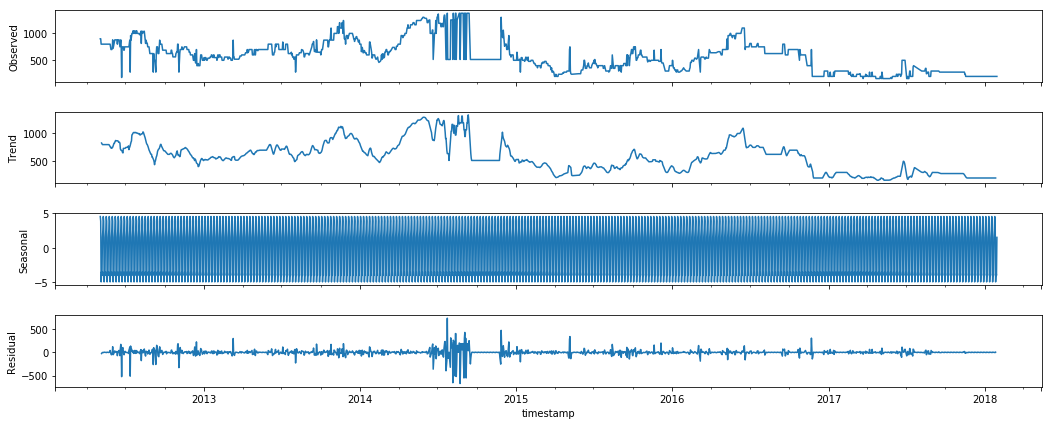

In [44]:
##Seasonal decompositon. 
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train_df_col).plot()
result = sm.tsa.stattools.adfuller(train_df_col)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()




In [69]:
#### 

fit2 = ExponentialSmoothing((np.asarray(pd_train_df_col[forecast_col_name])) ,seasonal_periods=20 ,trend='mul', seasonal='mul').fit()

pd_test_df_col["forecast_val_method2"]= fit2.forecast(len(test_df_col))
performance_statistics["method2"][forecast_col_name]= sqrt((pd_test_df_col[forecast_col_name]-pd_test_df_col["forecast_val_method2"]).apply(lambda x : x**2).mean().mean())

############ Plotting the graph
data_dict = {"df_train": pd_train_df_col,
             "df_test" : pd_test_df_col,
             "a_col_name_train": "min_price" ,
             "a_col_name_test": "min_price" ,
             "f_col_name": "forecast_val_method2",
             "time_col" : "Timestamp" , 
             "y_data_col" : "Min Price",
             "title" : "Min Price Validation plot based on SimpleExp Smoothing" ,
             "file_path" : "plots/min_plot_exp_smooth.png",
             "plot_show" : True,
             "hard_save" : True}






/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:182: RuntimeWarning: overflow encountered in double_scalars
  (alphac * (l[i - 1] * b[i - 1]**phi))
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:185: RuntimeWarning: overflow encountered in double_scalars
  b[i - 1]**phi)) + (gammac * s[i - 1])
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:183: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:186: RuntimeWarning: overflow encountered in multiply
  return sqeuclidean((l * b**phi) * s[:-(m - 1)], y)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  b[i - 1]**phi)) + (gammac * s[i - 1])
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encounter

In [71]:
performance_statistics

defaultdict(<function __main__.<lambda>>,
            {'method1': {'min_price': 349.2575349150111},
             'method2': {'min_price': inf}})

Saving Figure!!!!


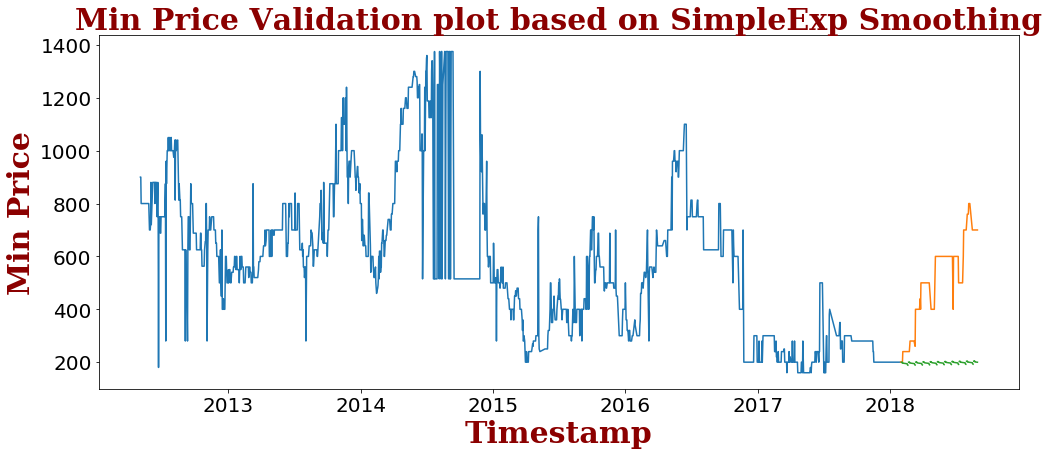

In [72]:
plot_forecasted_validation(data_dict)


In [ ]:
df.priceDate = pd.to_datetime(df.priceDate) #conveting the date column as index

In [ ]:
df.set_index('priceDate', inplace=True)

In [ ]:
df.plot()
plt.show()

In [ ]:
df.plot(use_index=True,y='minPrice')

In [ ]:
#mean = numpy.mean(elements, axis=0)
#sd = numpy.std(elements, axis=0)
#df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#def remove_outlier(df, col_name):
 #   q1 = df[col_name].quantile(0.25)
 #   q3 = df[col_name].quantile(0.75)
  #  iqr = q3-q1 #Interquartile range
   # fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    #df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    #return df_out
#final_list = [x for x in df['maxPrice'] if (x > mean - 2 * sd)]
#final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [ ]:
# remove_outlier(df,'maxPrice')
# remove_outlier(df,'modalPrice')
# remove_outlier(df,'minPrice')

In [ ]:
df.describe()

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
df.plot(use_index=True,y='maxPrice')

In [ ]:
df.plot(use_index=True,y='modalPrice')

In [ ]:
#rolmean=df.rolling(window=3).mean()
def add_mean_std_cols(df,col_name,t):
    res = df[col_name].rolling(t).agg(['mean'])
    #res.columns = res.columns.map('_'.join)
    #cols = np.concatenate(list(zip(df.columns, res.columns[0::2], res.columns[1::2])))
    #final = res.join(df).loc[:, cols]
    return res


#for i in range(2,10):
#   df['MA{}'.format(i)] = df.rolling(window=i).mean()


In [ ]:
n_df_min=add_mean_std_cols(df,["minPrice"],3)
n_df_max=add_mean_std_cols(df,["maxPrice"],3)
n_df_mode=add_mean_std_cols(df,["modalPrice"],3)

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean=plt.plot(n_df_min,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_max=plt.plot(n_df_max,label='mean')

In [ ]:
#original=plt.plot(df,color='gray',label='original')
mean_modal=plt.plot(n_df_mode,label='mean')

In [ ]:
from 